(np.float64(-0.5), np.float64(19.5), np.float64(19.5), np.float64(-0.5))

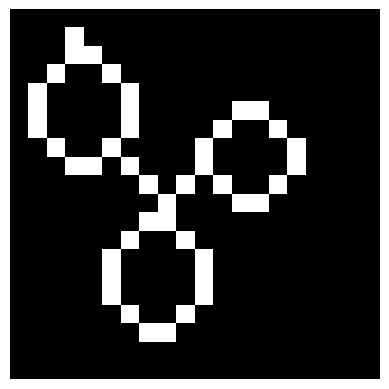

In [1]:
# image 20x20 exercice 2 question 2
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
                  [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                  [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 ])
plt.imshow(X,cmap='gray')
plt.axis('off')

Matrice de projection A de taille (1200, 400) :


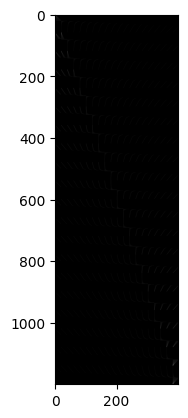

In [2]:
import numpy as np

def find_ray_pixel_incidence(n, a, b):
    """
    Cette fonction calcule le niveau de l'incidence d’un rayon entre deux points a et b
    avec les pixels d'une image représentée par une matrice carrée n par n.
    
    Arguments :
    n -- Taille de la matrice carrée (n x n).
    a -- Point de départ du rayon, sous la forme [x1, y1].
    b -- Point d'arrivée du rayon, sous la forme [x2, y2].
    
    Retourne :
    indm -- Matrice carrée contenant des 0 et des 1 (pixels traversés par le rayon).
    windm -- Matrice contenant la fraction du rayon traversant chaque pixel.
    ind1, ind2 -- Coordonnées des pixels traversés (abscisses et ordonnées).
    """
    x1, y1 = a
    x2, y2 = b
    m = n
    alphax = np.zeros(m + 1)
    alphay = np.zeros(m + 1)
    xplanes = np.arange(0, n + 1)
    yplanes = np.arange(0, m + 1)
    
    XM, xm = max(x1, x2), min(x1, x2)
    YM, ym = max(y1, y2), min(y1, y2)
    
    # Calcul des intersections avec les plans verticaux
    indxp = np.where((xm <= xplanes) & (XM >= xplanes))[0]
    for k in indxp:
        if (XM - xm) > 0:
            alphax[k] = (xplanes[k] - x1) / (x2 - x1)
        else:
            alphax[k] = 0
    
    # Calcul des intersections avec les plans horizontaux
    indyp = np.where((ym <= yplanes) & (YM >= yplanes))[0]
    for k in indyp:
        if (YM - ym) > 0:
            alphay[k] = (yplanes[k] - y1) / (y2 - y1)
        else:
            alphay[k] = 0
    
    # Union des fractions alpha
    alphas = np.union1d(alphax, alphay)
    alphas = alphas[np.argsort(alphas)]  # Assurer le tri des valeurs
    
    # Initialisation des matrices
    indm = np.zeros((m, n))
    windm = np.zeros((m, n))
    
    # Parcours des intervalles définis par alphas
    for k in range(len(alphas) - 1):
        midalphak = (alphas[k + 1] + alphas[k]) / 2
        xij = x1 + midalphak * (x2 - x1)
        yij = y1 + midalphak * (y2 - y1)
        JJ = max(1, int(np.ceil(xij))) - 1  # Ajuster pour indexer à partir de 0
        II = max(1, int(np.ceil(yij))) - 1  # Ajuster pour indexer à partir de 0
        indm[II, JJ] = 1
        windm[II, JJ] = alphas[k + 1] - alphas[k]
    
    # Extraction des indices des pixels traversés
    ind1, ind2 = np.where(indm == 1)
    
    return indm, windm, ind1, ind2



def find_projection_matrix(n):
    """
    Calcule la matrice de projection A correspondant à une image carrée n x n.
    
    Arguments :
    n -- Dimension de l'image carrée (n x n).
    
    Retourne :
    A -- Matrice de projection de dimensions (3 * n^2, n^2).
    """
    # Initialisation de la matrice de projection A
    A = np.zeros((3 * n**2, n**2))
    IA = 0  # Indice pour les lignes de A
    
    # Parcourir les rayons horizontaux
    for k1 in range(1, n + 1):
        a = [k1, 0]
        for k2 in range(0, n + 1):
            b = [0, k2]
            indm, windm, ind1, ind2 = find_ray_pixel_incidence(n, a, b)
            for kk in range(len(ind1)):
                JA = (ind2[kk] ) * n + (ind1[kk] )  # Conversion des indices 2D en 1D
                A[IA, JA] = windm[ind1[kk] , ind2[kk] ]  # Indices ajustés pour Python
            IA += 1

        # Parcourir les rayons verticaux
        for k2 in range(1, n + 1):
            b = [k2, n]
            indm, windm, ind1, ind2 = find_ray_pixel_incidence(n, a, b)
            for kk in range(len(ind1)):
                JA = (ind2[kk] ) * n + (ind1[kk] )
                A[IA, JA] = windm[ind1[kk] , ind2[kk] ]
            IA += 1

        # Parcourir les rayons diagonaux
        for k2 in range(n - 1, 0, -1):
            b = [n, k2]
            indm, windm, ind1, ind2 = find_ray_pixel_incidence(n, a, b)
            for kk in range(len(ind1)):
                JA = (ind2[kk] ) * n + (ind1[kk] )
                A[IA, JA] = windm[ind1[kk] , ind2[kk] ]
            IA += 1
    
    return A


A = find_projection_matrix(20)
print("Matrice de projection A de taille", A.shape, ":")
plt.imshow(A, cmap='gray')

